# Wine Quality Analysis

**Objective:** Analyze the Wine Quality dataset, perform EDA, build predictive models, and summarize actionable insights.

---


### Wine Quality Prediction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.inspection import permutation_importance


In [ ]:
# loading the dataset
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# checking for null values
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Data Preprocessing

In [ ]:
df['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


In [ ]:
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
df.rename(columns={'quality': 'good-quality'}, inplace=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good-quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


## Exploratory Data Analysis

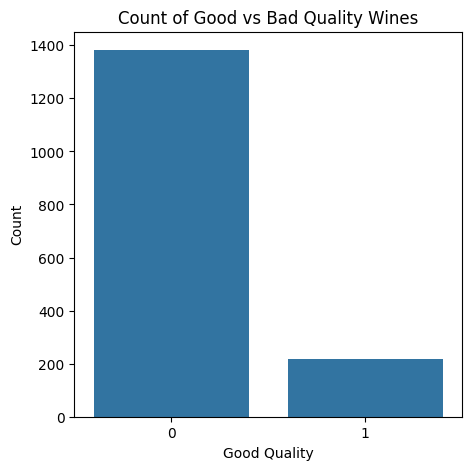

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='good-quality', data=df)
plt.xlabel('Good Quality')
plt.ylabel('Count')
plt.title('Count of Good vs Bad Quality Wines')
plt.show()

#### Analysis of coorelation between features

<Axes: >

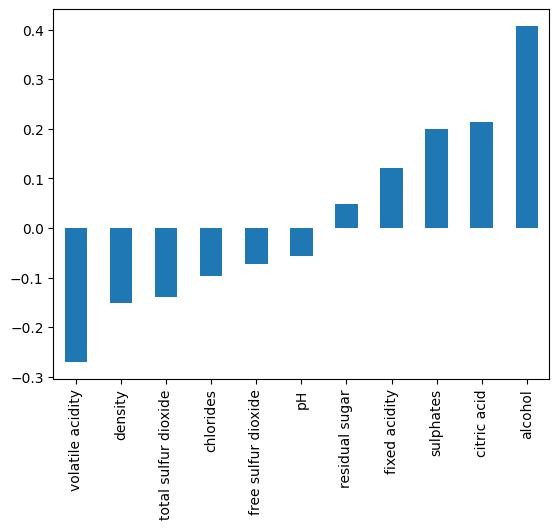

In [ ]:
df.corr()['good-quality'][:-1].sort_values().plot(kind='bar')

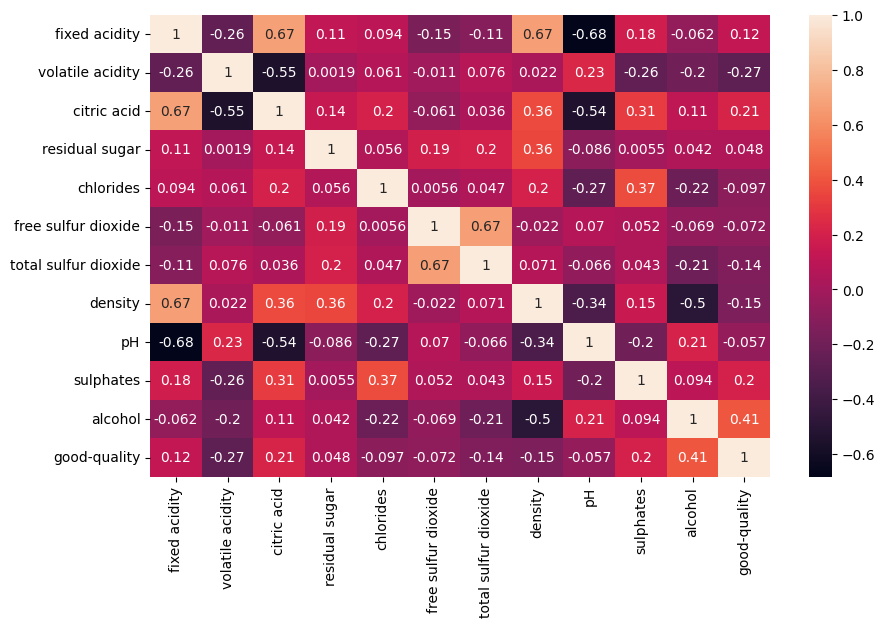

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

<Axes: xlabel='residual sugar', ylabel='alcohol'>

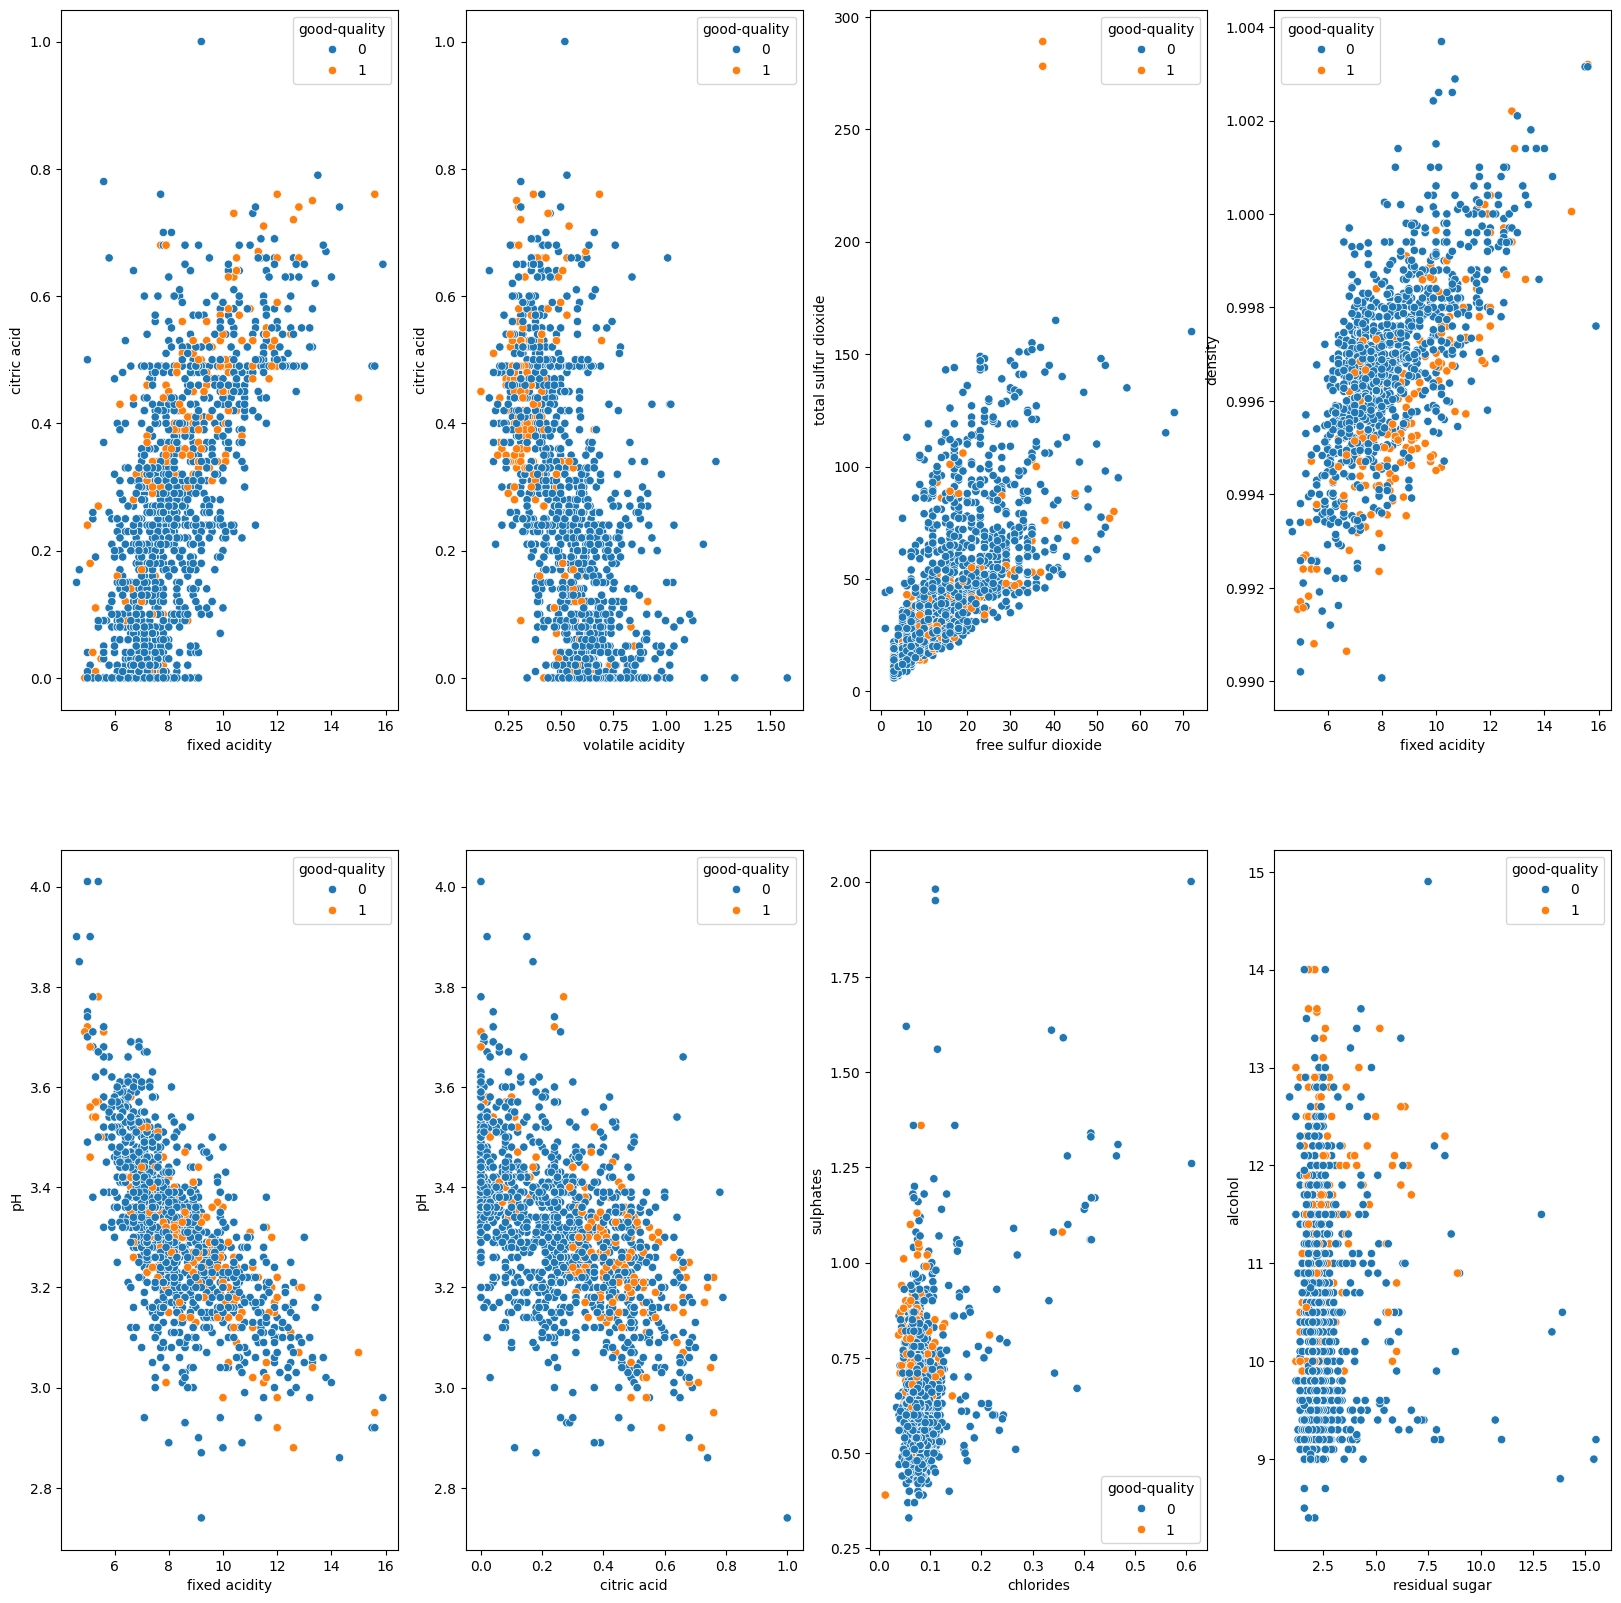

In [ ]:
fig, ax = plt.subplots(2,4,figsize=(20,20))
sns.scatterplot(x = 'fixed acidity', y = 'citric acid', hue = 'good-quality', data = df, ax=ax[0,0])
sns.scatterplot(x = 'volatile acidity', y = 'citric acid', hue = 'good-quality', data = df, ax=ax[0,1])
sns.scatterplot(x = 'free sulfur dioxide', y = 'total sulfur dioxide', hue = 'good-quality', data = df, ax=ax[0,2])
sns.scatterplot(x = 'fixed acidity', y = 'density', hue = 'good-quality', data = df, ax=ax[0,3])
sns.scatterplot(x = 'fixed acidity', y = 'pH', hue = 'good-quality', data = df, ax=ax[1,0])
sns.scatterplot(x = 'citric acid', y = 'pH', hue = 'good-quality', data = df, ax=ax[1,1])
sns.scatterplot(x = 'chlorides', y = 'sulphates', hue = 'good-quality', data = df, ax=ax[1,2])
sns.scatterplot(x = 'residual sugar', y = 'alcohol', hue = 'good-quality', data = df, ax=ax[1,3])


## Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('good-quality', axis=1), df['good-quality'], test_size=0.3, random_state=42)

## Model Training

### Logistic Regression

In [ ]:
lr = LogisticRegression()
lr


LogisticRegression()

In [ ]:
# training the model
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8873994638069705

In [ ]:
# testing the model
lr_pred = lr.predict(X_test)
accuracy_score(y_test, lr_pred)

0.8666666666666667

### Support Vector Machine (SVM)

In [ ]:
clf = svm.SVC(kernel='rbf')
clf

SVC()

In [ ]:
# training the model
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.8668453976764968

In [ ]:
# testing the model
sv_pred = clf.predict(X_test)
accuracy_score(y_test, sv_pred)

0.8625

### Decision Tree

In [ ]:
dtree = DecisionTreeClassifier()
dtree


DecisionTreeClassifier()

In [ ]:
# training the model
dtree.fit(X_train, y_train)
dtree.score(X_train, y_train)

1.0

In [ ]:
# testing the model
tr_pred = dtree.predict(X_test)
accuracy_score(y_test, tr_pred)

0.85625

### K-Nearest Neighbors (KNN)




In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn

KNeighborsClassifier()

In [ ]:
# training the model
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

0.9079535299374442

In [ ]:
# testing the model
kn_pred = knn.predict(X_test)
accuracy_score(y_test, kn_pred)

0.8583333333333333

### Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
# training the model
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

0.9991063449508489

In [ ]:
# testing the model
rf_pred = rf.predict(X_test)
accuracy_score(y_test, rf_pred)

0.89375

## Model Evaluation

### Logistic Regression

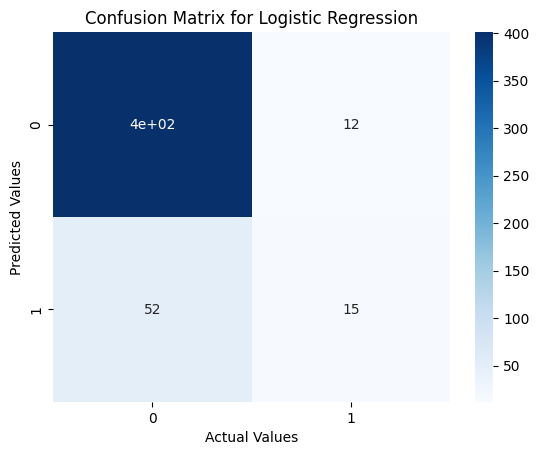

In [ ]:
# logistic regression model evaluation
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, cmap='Blues')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [ ]:
print('Logistic Regression Model Accuracy: ', accuracy_score(y_test, lr_pred))
print('Logistic Regression Model f1 score: ', metrics.f1_score(y_test, lr_pred))
print('Logistic Regression Model MAE: ', metrics.mean_absolute_error(y_test, lr_pred))
print('Logistic Regression Model RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))


Logistic Regression Model Accuracy:  0.8666666666666667
Logistic Regression Model f1 score:  0.3191489361702128
Logistic Regression Model MAE:  0.13333333333333333
Logistic Regression Model RMSE:  0.3651483716701107


### Support Vector Machine (SVM)

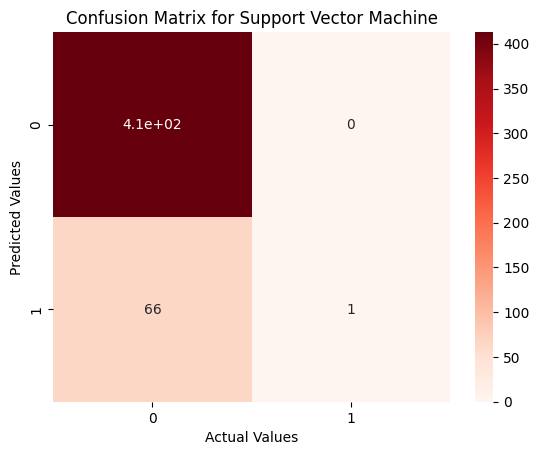

In [ ]:
sns.heatmap(confusion_matrix(y_test, sv_pred), annot=True, cmap='Reds')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('Confusion Matrix for Support Vector Machine')
plt.show()

In [ ]:
print('Support Vector Machine Model Accuracy: ', accuracy_score(y_test, sv_pred))
print('Support Vector Machine Model f1 score: ', metrics.f1_score(y_test, sv_pred))
print('Support Vector Machine Model MAE: ', metrics.mean_absolute_error(y_test, sv_pred))
print('Support Vector Machine Model RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, sv_pred)))

Support Vector Machine Model Accuracy:  0.8625
Support Vector Machine Model f1 score:  0.029411764705882353
Support Vector Machine Model MAE:  0.1375
Support Vector Machine Model RMSE:  0.37080992435478316


### Decision Tree

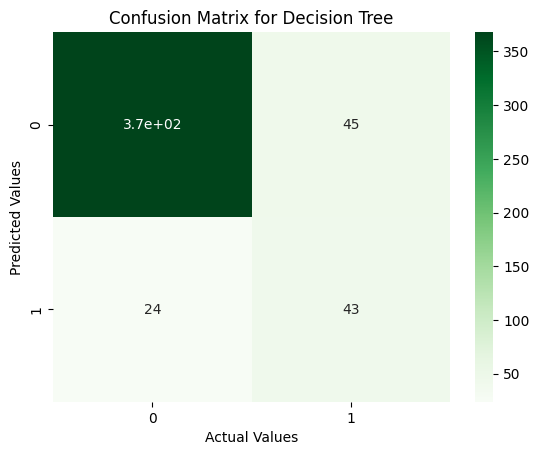

In [ ]:
sns.heatmap(confusion_matrix(y_test, tr_pred), annot=True, cmap='Greens')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

In [ ]:
print('Decision Tree Model Accuracy: ', accuracy_score(y_test, tr_pred))
print('Decision Tree Model f1 score: ', metrics.f1_score(y_test, tr_pred))
print('Decision Tree Model MAE: ', metrics.mean_absolute_error(y_test, tr_pred))
print('Decision Tree Model RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, tr_pred)))

Decision Tree Model Accuracy:  0.85625
Decision Tree Model f1 score:  0.5548387096774193
Decision Tree Model MAE:  0.14375
Decision Tree Model RMSE:  0.3791437722025775


### K-Nearest Neighbors (KNN)

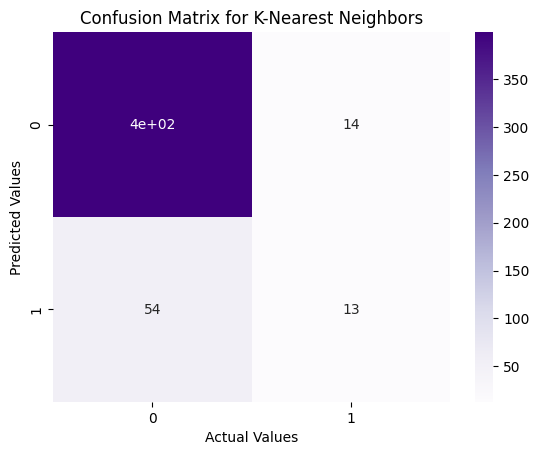

In [ ]:
sns.heatmap(confusion_matrix(y_test, kn_pred), annot=True, cmap='Purples')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('Confusion Matrix for K-Nearest Neighbors')
plt.show()

In [ ]:
print('K-Nearest Neighbors Model Accuracy: ', accuracy_score(y_test, kn_pred))
print('K-Nearest Neighbors Model f1 score: ', metrics.f1_score(y_test, kn_pred))
print('K-Nearest Neighbors Model MAE: ', metrics.mean_absolute_error(y_test, kn_pred))
print('K-Nearest Neighbors Model RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, kn_pred)))

K-Nearest Neighbors Model Accuracy:  0.8583333333333333
K-Nearest Neighbors Model f1 score:  0.2765957446808511
K-Nearest Neighbors Model MAE:  0.14166666666666666
K-Nearest Neighbors Model RMSE:  0.3763863263545405


###Random Forest

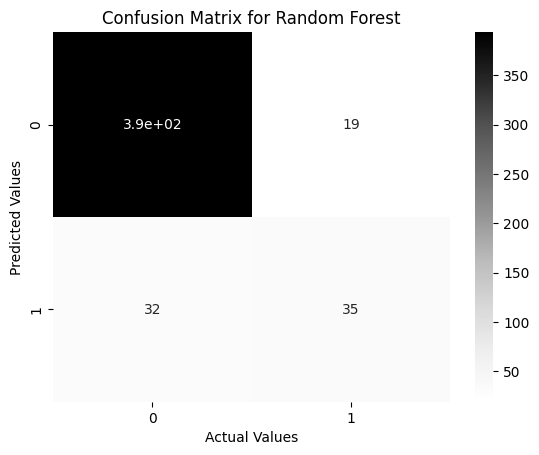

In [ ]:
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, cmap='Greys')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [ ]:
print('Random Forest Model Accuracy: ', accuracy_score(y_test, rf_pred))
print('Random Forest Model f1 score: ', metrics.f1_score(y_test, rf_pred))
print('Random Forest Model MAE: ', metrics.mean_absolute_error(y_test, rf_pred))
print('Random Forest Model RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))

Random Forest Model Accuracy:  0.89375
Random Forest Model f1 score:  0.5785123966942148
Random Forest Model MAE:  0.10625
Random Forest Model RMSE:  0.32596012026013244


### Model Comparison

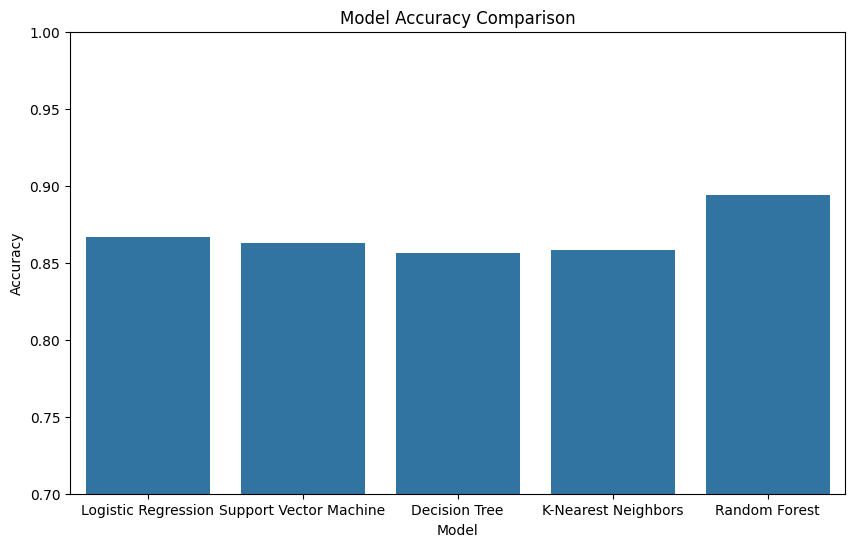

In [ ]:
models = ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'K-Nearest Neighbors', 'Random Forest']
accuracy = [accuracy_score(y_test, lr_pred), accuracy_score(y_test, sv_pred), accuracy_score(y_test, tr_pred), accuracy_score(y_test, kn_pred), accuracy_score(y_test, rf_pred)]
plt.figure(figsize=(10,6))
sns.barplot(x=models, y=accuracy)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)
plt.show()

## Conclusion

It is observed that the Logistic Regression model performs the best on the test set with an accuracy of 86.67%. The model can predict the quality of the wine based on the given features with an accuracy of 86.67%.

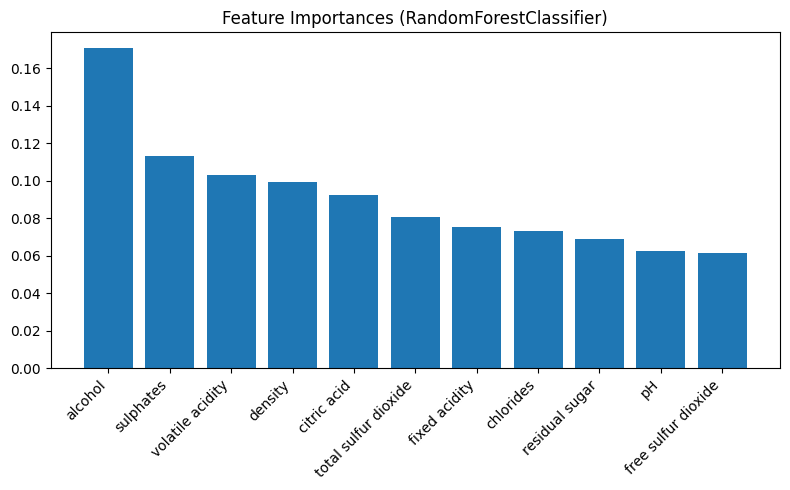

,feature,importance
0,alcohol,0.170513
1,sulphates,0.113009
2,volatile acidity,0.102843
3,density,0.099223
4,citric acid,0.092148
5,total sulfur dioxide,0.080623
6,fixed acidity,0.075441
7,chlorides,0.073359
8,residual sugar,0.068973
9,pH,0.062538


In [ ]:

X = df.drop(columns=['good-quality'])
y = df['good-quality']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit RandomForestClassifier for feature importances
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)
importances = clf.feature_importances_
feat_names = X.columns.tolist()

# Plot feature importances
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8,5))
plt.title('Feature Importances (RandomForestClassifier)')
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), [feat_names[i] for i in indices], rotation=45, ha='right')
plt.tight_layout()
plt.show()

# a small table of importances
imp_df = pd.DataFrame({'feature': [feat_names[i] for i in indices], 'importance': importances[indices]})
imp_df.head(10)



##Clustering comparison & interpretation

This section compares classic clustering techniques on the physicochemical features (without using the `quality` label). The goal is to explore natural groupings in the data and check whether clusters align with perceived quality bands.

- Standardized all features and used PCA (2 components) for visualization only.
- Compared KMeans and Agglomerative clustering for k between 2 and 6, and DBSCAN for a few eps values.
- Evaluated clusters using **Silhouette Score** (higher is better) and **Davies-Bouldin Index** (lower is better).

**Key interpretation guidelines (to include in portfolio view)**
- If silhouette scores are low (< 0.25), the dataset does not have strong cluster structure under that method; clusters may overlap.
- Use PCA plots to present cluster separation visually — if clusters overlap heavily, emphasize continuity of quality rather than discrete clusters.
- Link clusters back to average `quality` per cluster to understand whether discovered clusters capture differences in wine quality.

In [ ]:

# Clustering comparison: KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality reduction for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

results = []


In [ ]:
# KMeans (try k=2..6)
for k in range(2,7):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    db = davies_bouldin_score(X_scaled, labels)
    results.append({'method': f'KMeans_k={k}', 'silhouette': sil, 'db': db, 'labels': labels})

In [ ]:
# Agglomerative (2..6)
for k in range(2,7):
    ag = AgglomerativeClustering(n_clusters=k)
    labels = ag.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    db = davies_bouldin_score(X_scaled, labels)
    results.append({'method': f'Agglomerative_k={k}', 'silhouette': sil, 'db': db, 'labels': labels})

In [ ]:
# DBSCAN (try a couple eps values)
for eps in [0.5, 0.7, 0.9]:
    dbs = DBSCAN(eps=eps, min_samples=5)
    labels = dbs.fit_predict(X_scaled)
    # If single cluster or all noise, skip silhouette
    if len(set(labels)) > 1 and len(set(labels)) < len(X_scaled):
        sil = silhouette_score(X_scaled, labels)
        db = davies_bouldin_score(X_scaled, labels)
    else:
        sil = np.nan
        db = np.nan
    results.append({'method': f'DBSCAN_eps={eps}', 'silhouette': sil, 'db': db, 'labels': labels})

In [ ]:
# Summarize best silhouette
res_df = pd.DataFrame([{'method': r['method'], 'silhouette': r['silhouette'], 'db': r['db']} for r in results])
res_df = res_df.sort_values(by='silhouette', ascending=False)
print('Clustering evaluation (sorted by silhouette):')
display(res_df)

Clustering evaluation (sorted by silhouette):


,method,silhouette,db
0,KMeans_k=2,0.213730,1.871100
4,KMeans_k=6,0.194729,1.398426
3,KMeans_k=5,0.190139,1.462505
1,KMeans_k=3,0.189204,1.767265
5,Agglomerative_k=2,0.183402,2.029574
2,KMeans_k=4,0.171636,1.657378
7,Agglomerative_k=4,0.171418,1.664853
6,Agglomerative_k=3,0.157747,1.973112
8,Agglomerative_k=5,0.154476,1.563835
9,Agglomerative_k=6,0.149503,1.526313


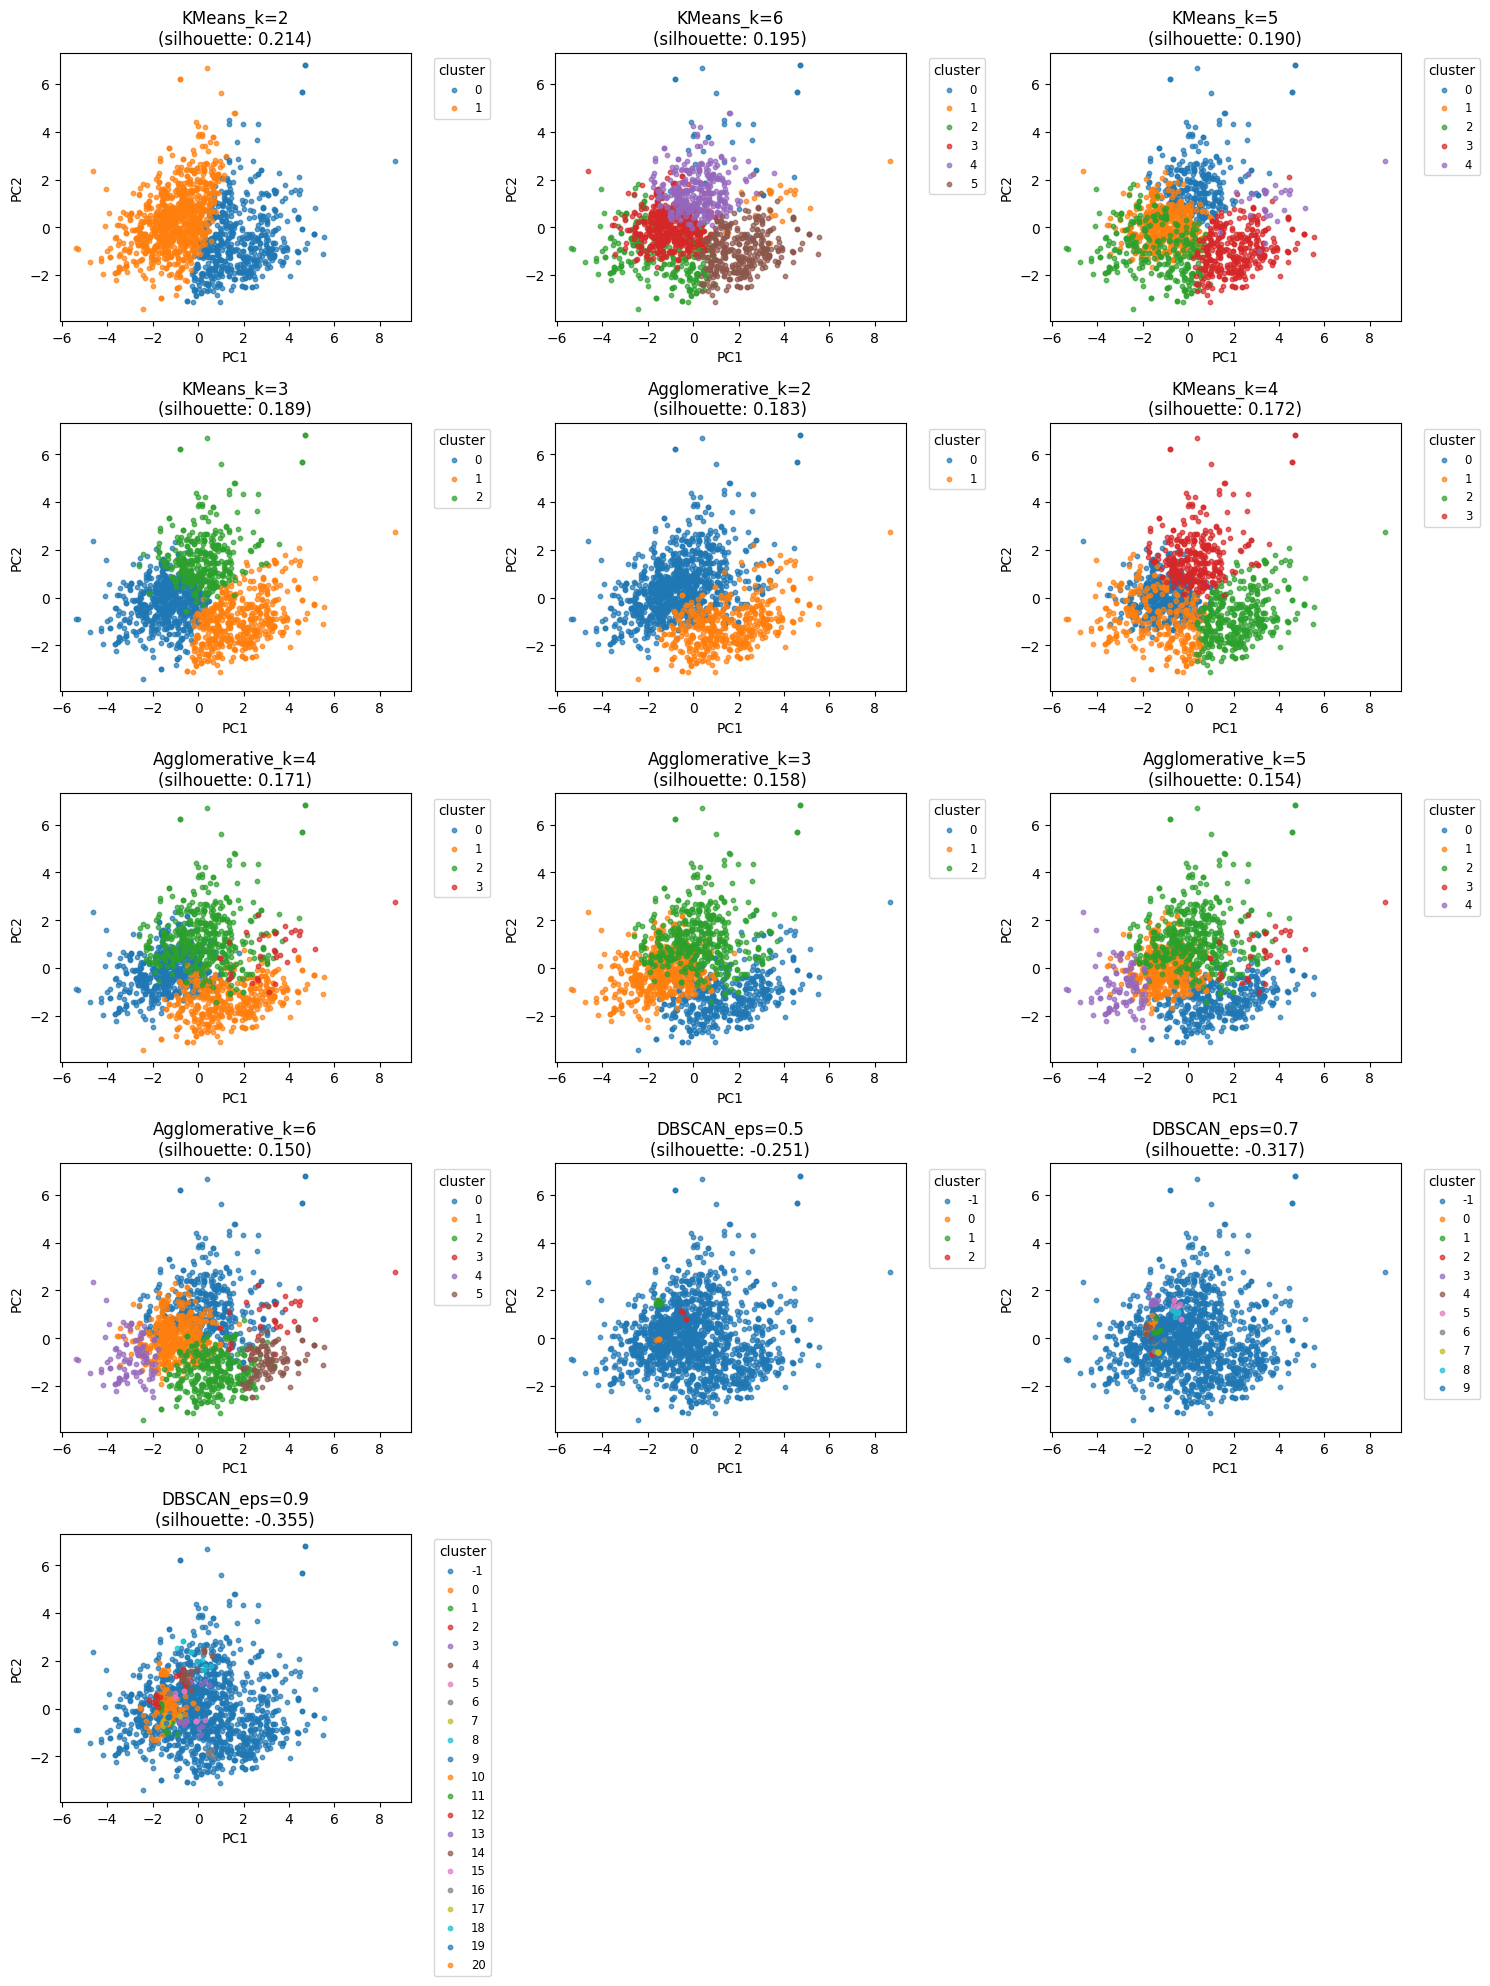

In [ ]:
# Visualize on PCA scatter - ALL methods
all_methods = res_df['method'].dropna().tolist()
n_methods = len(all_methods)

# Calculate grid dimensions for subplots
n_cols = 3
n_rows = (n_methods + n_cols - 1) // n_cols  # Ceiling division

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, method in enumerate(all_methods, 1):
    labels = next(r['labels'] for r in results if r['method'] == method)
    plt.subplot(n_rows, n_cols, i)
    unique_labels = np.unique(labels)

    for lab in unique_labels:
        mask = labels == lab
        plt.scatter(X_pca[mask, 0], X_pca[mask, 1], s=10, label=str(lab), alpha=0.7)

    plt.title(f'{method}\n(silhouette: {res_df[res_df["method"]==method]["silhouette"].values[0]:.3f})')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(title='cluster', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.tight_layout()
plt.show()


# Clustering on Principal Components

This section performs PCA (2 components) on standardized physicochemical features and applies three clustering algorithms: **KMeans**, **DBSCAN**, and **AgglomerativeClustering**. Visualizations show the cluster assignments on the 2D PCA scatter.


/tmp/ipython-input-2230614232.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = plt.cm.get_cmap('tab10', len(np.unique(labels)))
/tmp/ipython-input-2230614232.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = plt.cm.get_cmap('tab10', len(np.unique(labels)))
/tmp/ipython-input-2230614232.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = plt.cm.get_cmap('tab10', len(np.unique(labels)))


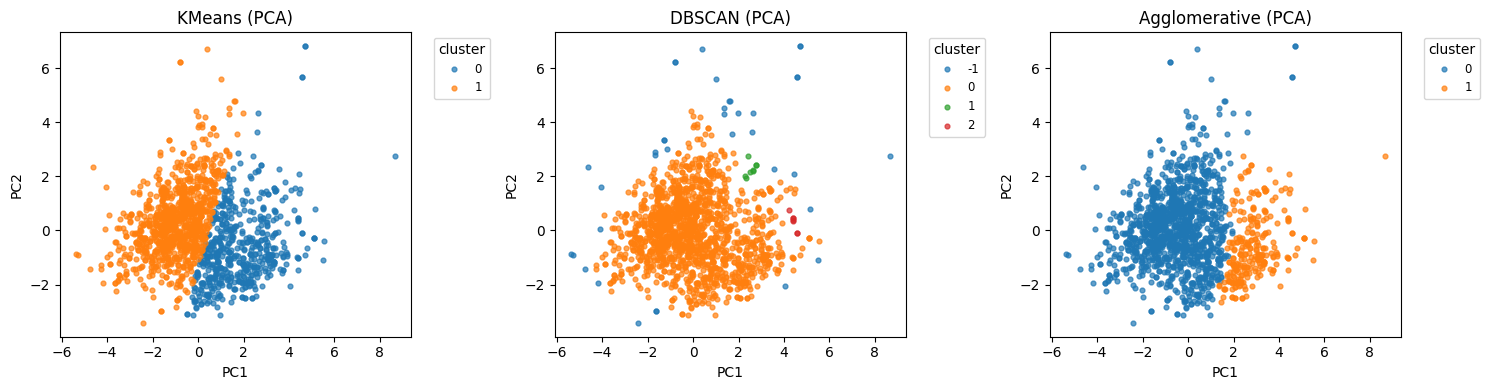

PCA-based clustering scores:


,method,silhouette,db
0,KMeans,0.398165,1.013230
1,DBSCAN,0.224659,1.956582
2,Agglomerative,0.405928,0.833938


In [ ]:

# Clustering on PCA (2 components)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Define clustering methods
km = KMeans(n_clusters=2, random_state=42, n_init=10)
db = DBSCAN(eps=0.5, min_samples=5)
ag = AgglomerativeClustering(n_clusters=2)

methods = {'KMeans': km, 'DBSCAN': db, 'Agglomerative': ag}
results_pca = []

plt.figure(figsize=(15,4))
for i, (name, model) in enumerate(methods.items(), start=1):
    labels = model.fit_predict(X_pca if hasattr(model, 'fit_predict') else X_pca)
    # for DBSCAN labels may be -1..
    unique = len(set(labels))
    try:
        sil = silhouette_score(X_pca, labels) if unique > 1 and unique < len(X_pca) else np.nan
        dbi = davies_bouldin_score(X_pca, labels) if unique > 1 and unique < len(X_pca) else np.nan
    except Exception:
        sil = np.nan; dbi = np.nan
    results_pca.append({'method': name, 'silhouette': sil, 'db': dbi, 'labels': labels})

    plt.subplot(1,3,i)
    palette = plt.cm.get_cmap('tab10', len(np.unique(labels)))
    for lab in np.unique(labels):
        mask = labels == lab
        plt.scatter(X_pca[mask,0], X_pca[mask,1], s=12, label=str(lab), alpha=0.7)
    plt.title(f'{name} (PCA)')
    plt.xlabel('PC1'); plt.ylabel('PC2')
    plt.legend(title='cluster', bbox_to_anchor=(1.05,1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()

import pandas as pd
res_pca_df = pd.DataFrame(results_pca)[['method','silhouette','db']]
print('PCA-based clustering scores:')
display(res_pca_df)



# Clustering on Top 5 Features

Now we repeat clustering using only the top 5 features (selected from feature importance): **alcohol, sulphates, volatile acidity, density, citric acid**.
We will standardize these features, run the same clustering methods, visualize them on PCA(2) of the selected features, and compute the same scoring metrics.


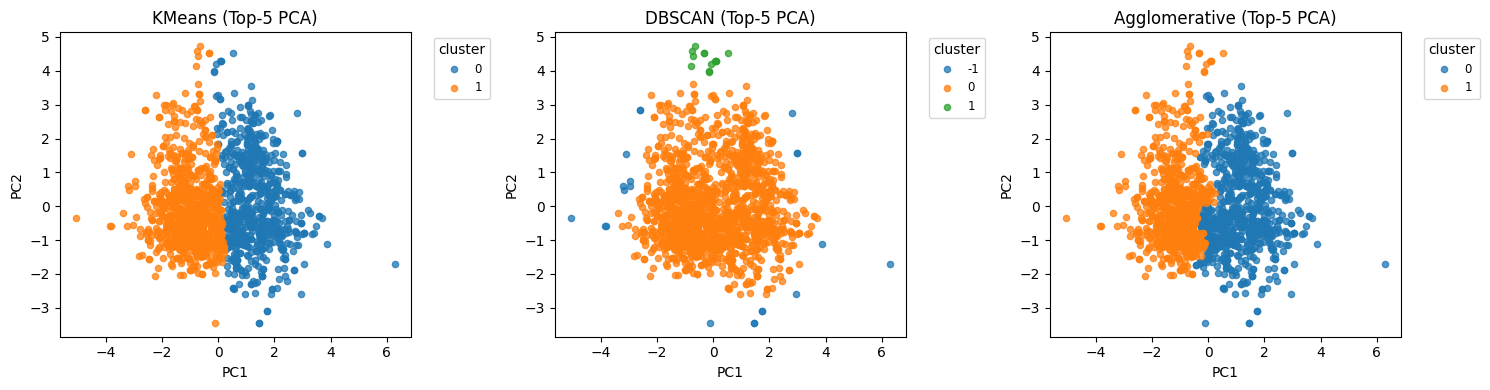

Top-5-based clustering scores:


,method,silhouette,db
0,KMeans,0.385177,1.080925
1,DBSCAN,0.376028,8.581614
2,Agglomerative,0.362869,1.111220


In [ ]:

# Clustering on Top-5 features
top_features = ['alcohol', 'sulphates', 'volatile acidity', 'density', 'citric acid']
X_top = df[top_features]

scaler_top = StandardScaler()
X_top_scaled = scaler_top.fit_transform(X_top)

pca_top = PCA(n_components=2, random_state=42)
X_top_pca = pca_top.fit_transform(X_top_scaled)

# Use same methods
results_top = []

plt.figure(figsize=(15,4))
for i, (name, model) in enumerate(methods.items(), start=1):
    labels = model.fit_predict(X_top_pca if hasattr(model, 'fit_predict') else X_top_pca)
    unique = len(set(labels))
    try:
        sil = silhouette_score(X_top_pca, labels) if unique > 1 and unique < len(X_top_pca) else np.nan
        dbi = davies_bouldin_score(X_top_pca, labels) if unique > 1 and unique < len(X_top_pca) else np.nan
    except Exception:
        sil = np.nan; dbi = np.nan
    results_top.append({'method': name, 'silhouette': sil, 'db': dbi, 'labels': labels})

    plt.subplot(1,3,i)
    for lab in np.unique(labels):
        mask = labels == lab
        plt.scatter(X_top_pca[mask,0], X_top_pca[mask,1], s=20, label=str(lab), alpha=0.75)
    plt.title(f'{name} (Top-5 PCA)')
    plt.xlabel('PC1'); plt.ylabel('PC2')
    plt.legend(title='cluster', bbox_to_anchor=(1.05,1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()

res_top_df = pd.DataFrame(results_top)[['method','silhouette','db']]
print('Top-5-based clustering scores:')
display(res_top_df)



# Comparison of Silhouette Scores

This chart compares the silhouette scores of each clustering method when applied to PCA of all features vs PCA of the top-5 features. Higher silhouette indicates better cluster separation.


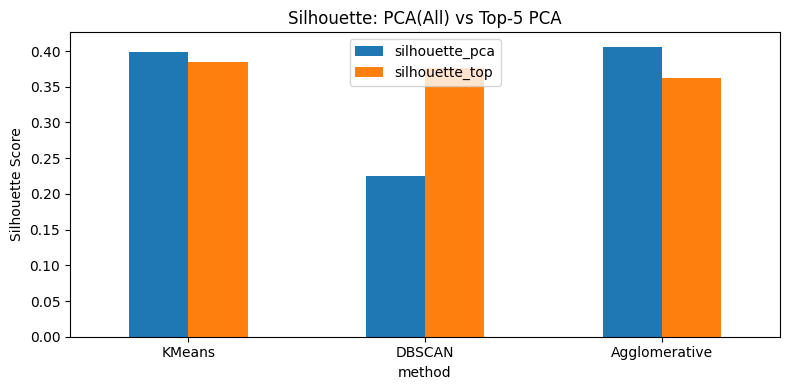

,silhouette_pca,silhouette_top
method,,
KMeans,0.398165,0.385177
DBSCAN,0.224659,0.376028
Agglomerative,0.405928,0.362869


In [ ]:

# Comparison plot
import matplotlib.pyplot as plt
comp_df = res_pca_df.merge(res_top_df, on='method', suffixes=('_pca','_top')).set_index('method')
comp_df = comp_df[['silhouette_pca','silhouette_top']].dropna(how='all')

comp_df.plot(kind='bar', figsize=(8,4), rot=0, title='Silhouette: PCA(All) vs Top-5 PCA')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

# Also print numeric comparison
display(comp_df)
